## Check to see if I have any cold lenses off Dotson Ice Shelf

Hydrographic surveys in the Dotson Trough in the Amundsen Sea in January-February 2022 using a fleet of ocean gliders reveal deep (~400 m) isolated lenses of cold, dense water. The water contained within these lenses is colder, saltier, deeper and denser than the typical regional Winter Water (temperature-minimum) layer that appears above the lenses at about 200 m in summer.  The lenses occur in the stratified layer influenced by the warm, salty and dense modified Circumpolar Deep Water below. We do not have evidence of the lenses travelling beneath the ice shelves, but they are at about the right depth to do so. 

The lenses are colder (close to the local freezing point of seawater) than the surrounding waters at the same depths and densities, and fresher than the surrounding water at the same densities. Their dissolved oxygen concentration is similar to that of Winter Water and their pH is lower than Winter Water, but both properties are increased compared with surrounding water at the same depth. Thus, they provide a mechanism to sequester carbon and oxygen deeper than typical Winter Water formation can achieve.

We explore possible formation mechanisms for the lenses and the water mass they contain, using wintertime profiles of temperature and salinity obtained from tags on seals. One possibility is that local chimneys of deep convection succeed in penetrating sporadically to 400 m, and are subsequently capped by other water masses.  We do not find convincing evidence to support this.  Our favoured hypothesis is that the shallower regions (less than 500 m water depth) surrounding the Dotson Trough (e.g. Bear and Martin Peninsulas) host enhanced surface heat loss and subsequently intense brine rejection during sea ice formation, leading to very cold, dense water in winter. The seal tag profiles do indeed show wintertime water masses in these shallower regions of the same temperature, salinity and density as the lenses. We speculate that this water spills off into the deeper water sporadically (perhaps akin to the formation mechanism for Meddies). They would then populate the layer at which they are neutrally buoyant, beneath the typical Winter Water and invading the uppermost layers of modified Circumpolar Deep Water.

In [1]:
import xarray as xr
import numpy as np
import glob
import cmocean
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/users/birgal/')

In [2]:
base_dir     = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'
ens1011_dir  = f'{base_dir}output/CESM2_tune0_ens1011_monthly/files0/' 
highfreq_dir = f'{base_dir}output/ERA5_test6_highres/files/'
era5_dir     = f'{base_dir}output/ERA5_test6/files/' 

In [6]:
cesm2    = xr.open_dataset(f'{ens1011_dir}eANT025.L121_1m_19620101_19621231_grid_T.nc')
highfreq = xr.open_mfdataset(f'{highfreq_dir}*grid_T*200501*.nc')
xsel = 695
ysel = slice(215,260)

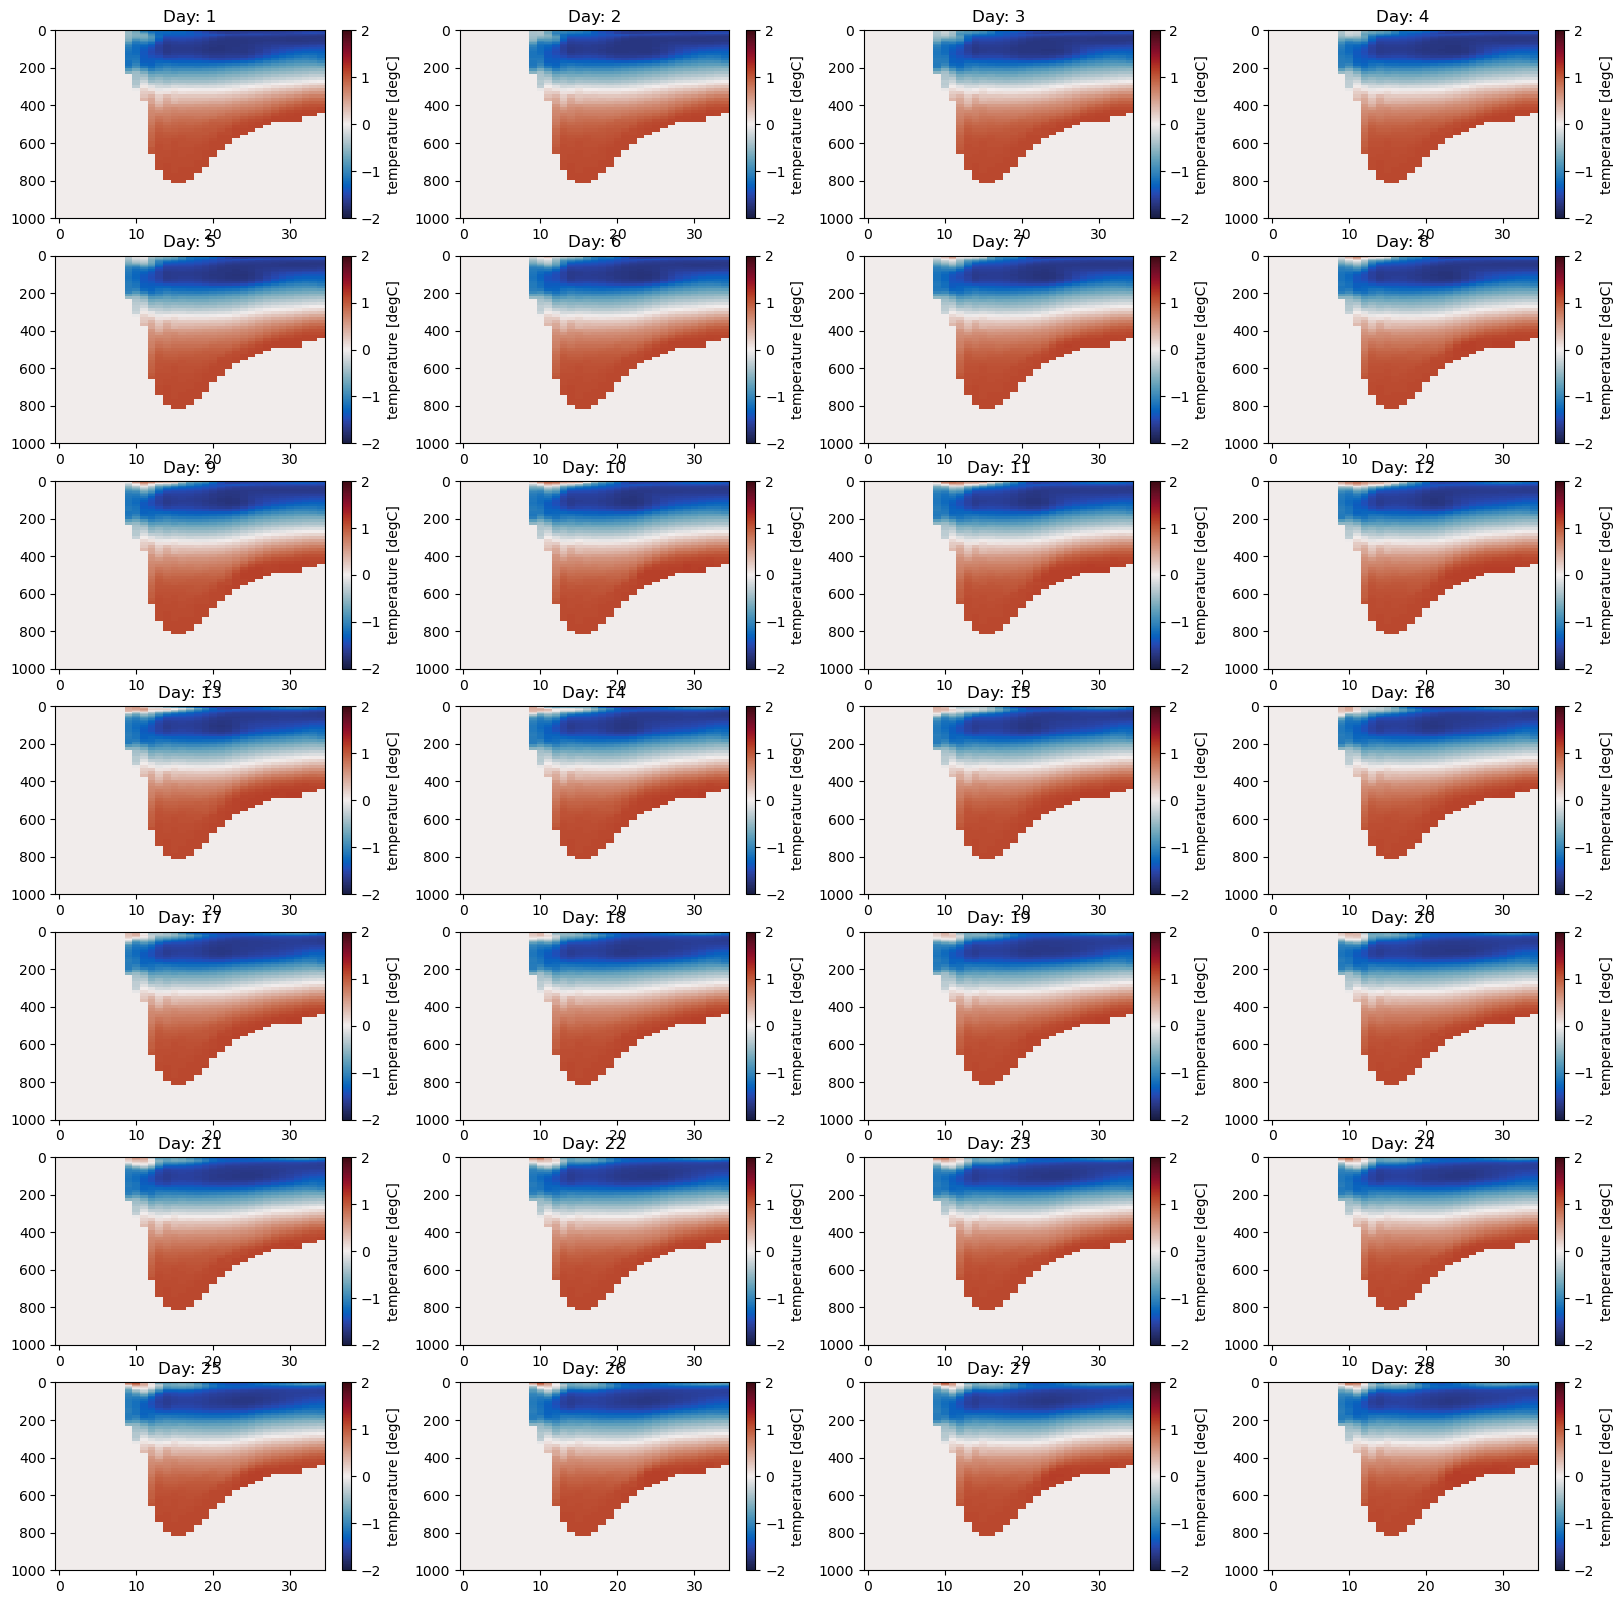

In [66]:
fig, ax = plt.subplots(7,4, figsize=(20,20))

for a, axis in enumerate(ax.ravel()):
    highfreq.thetao.isel(time_counter=a,x_grid_T=xsel,y_grid_T=ysel).plot(ylim=(1000,0), vmin=-2, vmax=2, cmap=cmocean.cm.balance, ax=axis)
    axis.set_title(f'Day: {a+1}')
    axis.set_xlabel(''); axis.set_ylabel('');

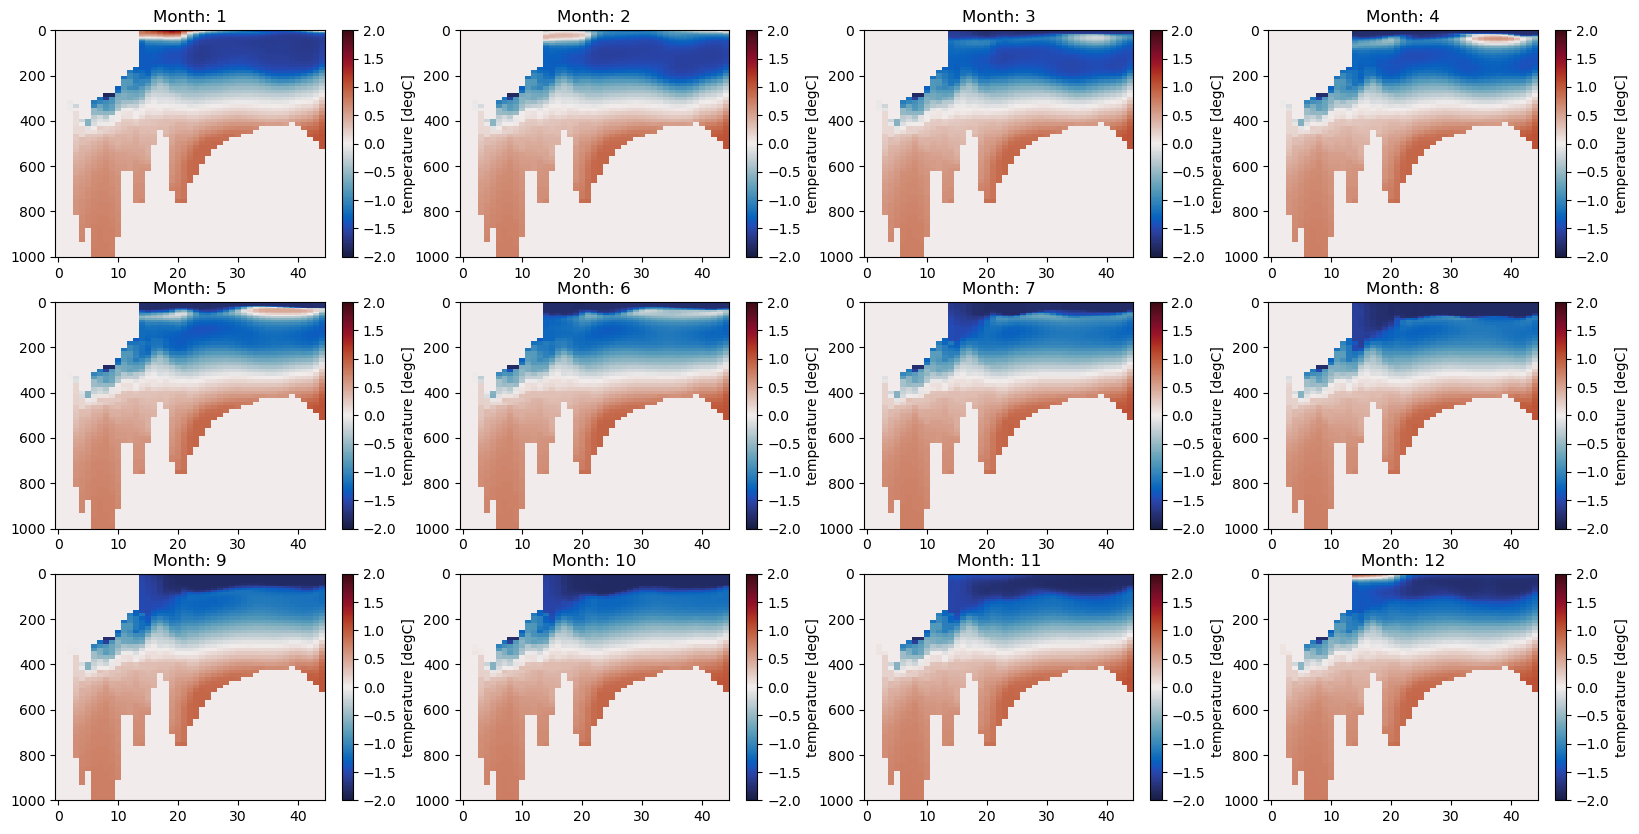

In [7]:
fig, ax = plt.subplots(3,4, figsize=(20,10))

for a, axis in enumerate(ax.ravel()):
    cesm2var = cesm2.isel(x_grid_T=xsel,y_grid_T=ysel)
    (cesm2var.isel(time_counter=a).thetao).plot(ylim=(1000,0), vmin=-2, vmax=2, cmap=cmocean.cm.balance, ax=axis)
    axis.set_title(f'Month: {a+1}')
    axis.set_xlabel(''); axis.set_ylabel('');

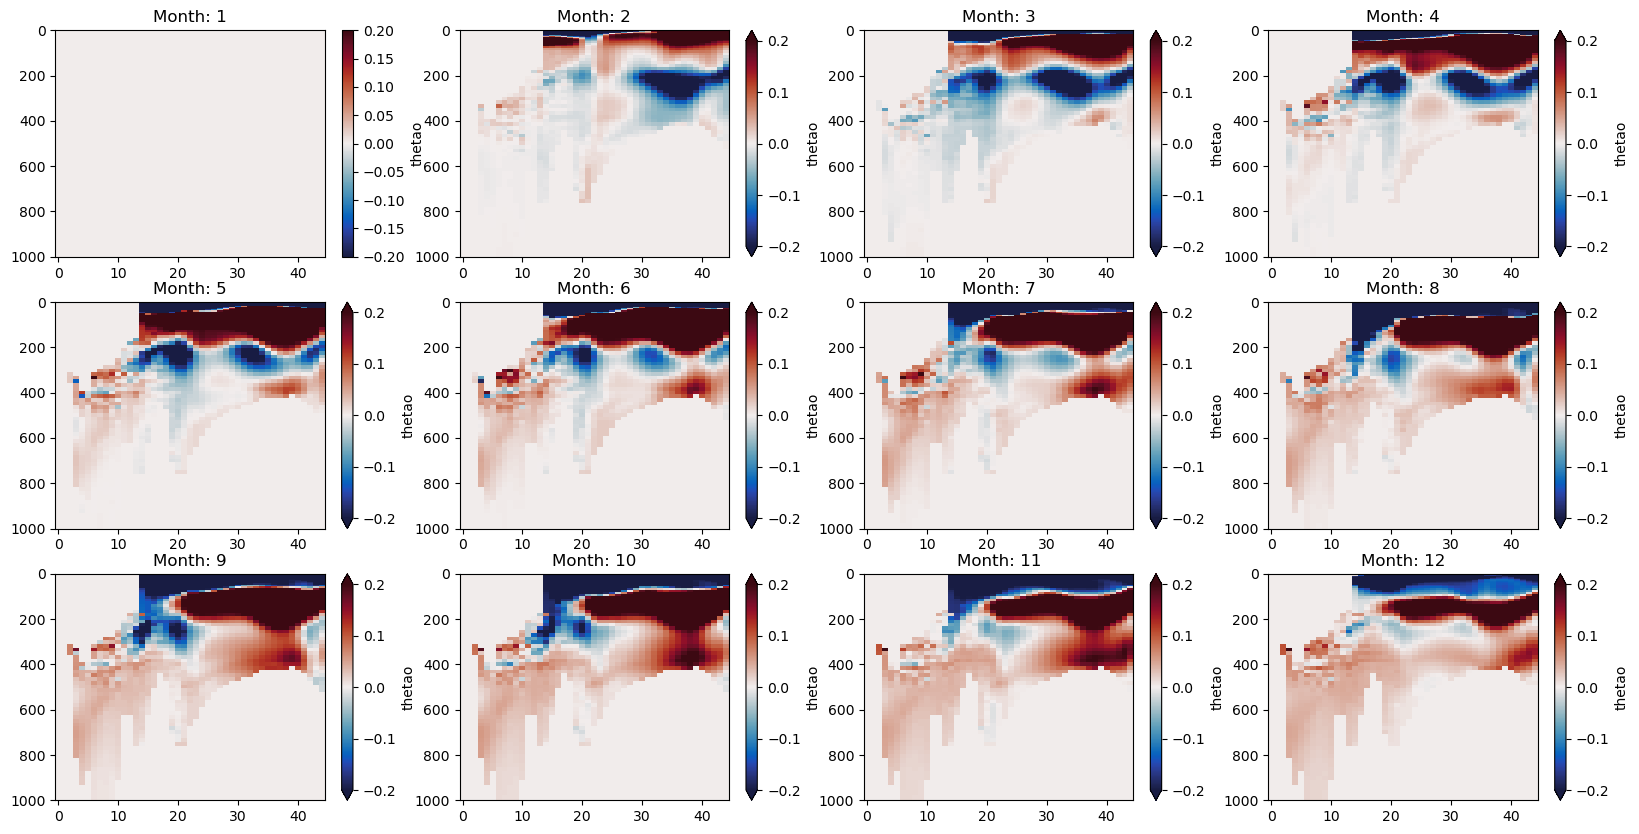

In [9]:
fig, ax = plt.subplots(3,4, figsize=(20,10))

for a, axis in enumerate(ax.ravel()):
    cesm2var = cesm2.isel(x_grid_T=xsel,y_grid_T=ysel)
    (cesm2var.isel(time_counter=a).thetao - cesm2var.thetao.isel(time_counter=0)).plot(ylim=(1000,0), vmin=-0.2, vmax=0.2, cmap=cmocean.cm.balance, ax=axis)
    axis.set_title(f'Month: {a+1}')
    axis.set_xlabel(''); axis.set_ylabel('');

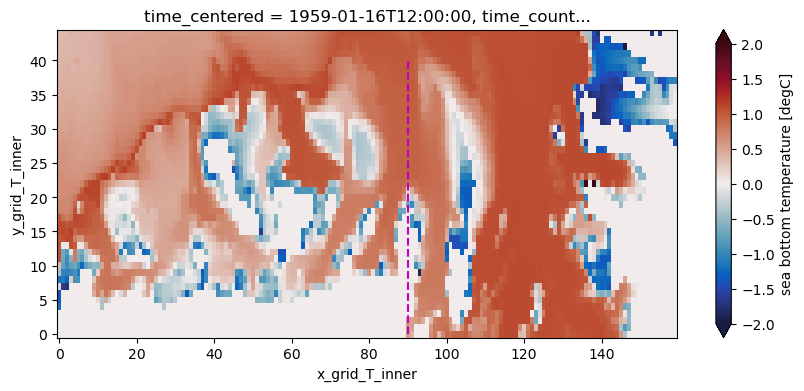

In [50]:
fig, ax = plt.subplots(1,1, figsize=(10,4))
cesm2.sbt.isel(time_counter=0, x_grid_T_inner=slice(600,760),y_grid_T_inner=ysel).plot(vmin=-2, vmax=2, cmap=cmocean.cm.balance, ax=ax)
ax.plot([90,90], [0,40],'--m')